In [1]:
# Data Processing
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'sklearn'

In [21]:
# Read the files of both test and train data
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

# Find general information regarding test data
print(test_data.head(5))
print('\n\nTest Data Columns')
print(test_data.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [22]:
# Find general information regarding test data
print(test_data.head(5))
print(test_data.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [23]:
# Determine quantity of null values within data set
print('Test Data Null Values')
print(test_data.isnull().sum())
print('\n')
print('Train Data Null Values')
print(train_data.isnull().sum())

Test Data Null Values
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Train Data Null Values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [24]:
# Delete rows with null values within data set
test_data = test_data.dropna()
train_data = train_data.dropna()

# Delete Loan_ID column as it serves no purpose  
test_data = test_data.drop(['Loan_ID'], axis=1)
train_data = train_data.drop(['Loan_ID'], axis=1)

# Ensure that all rows with null values have been deleted
print('Test Data Null Values')
print(test_data.isnull().sum(), '\n')

print('Train Data Null Values')
print(train_data.isnull().sum())

Test Data Null Values
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64 

Train Data Null Values
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [25]:
# Ensure that all rows with null values have been deleted
print(test_data.shape)
test_data.isnull().sum()
train_data.isnull().sum()

(289, 11)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

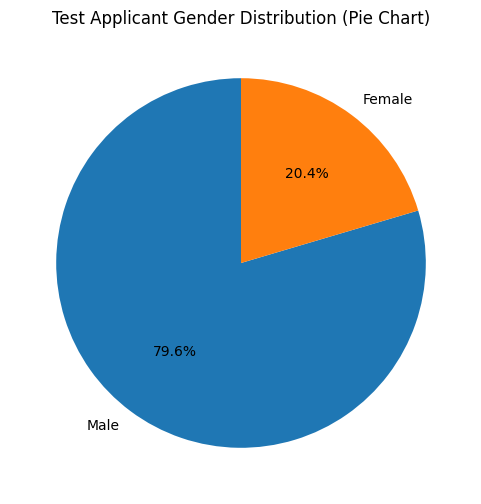

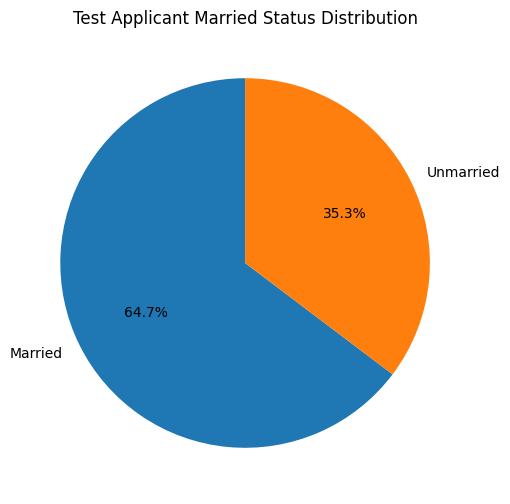

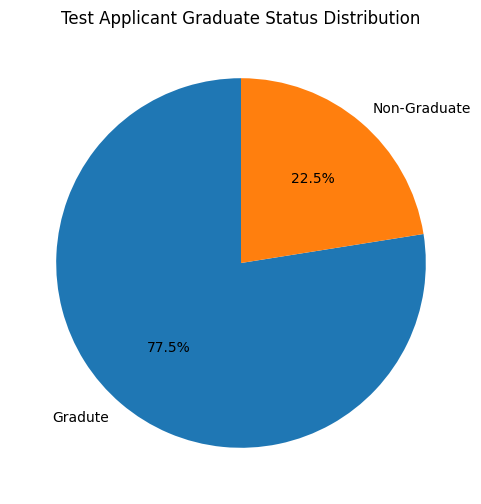

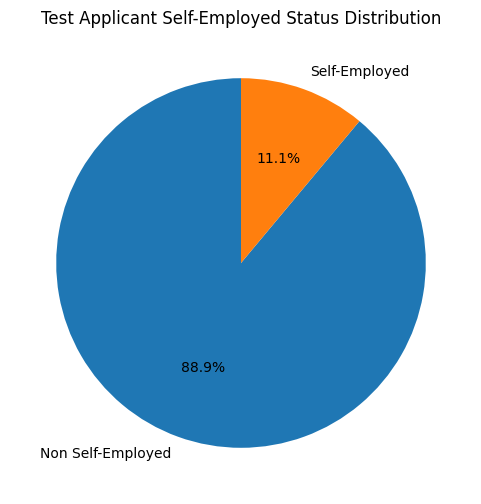

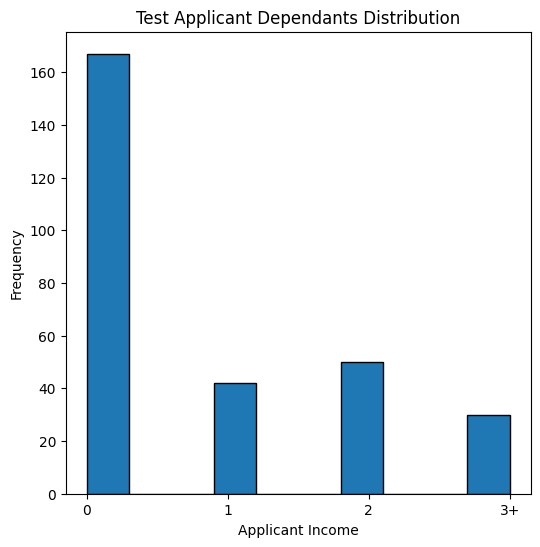

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


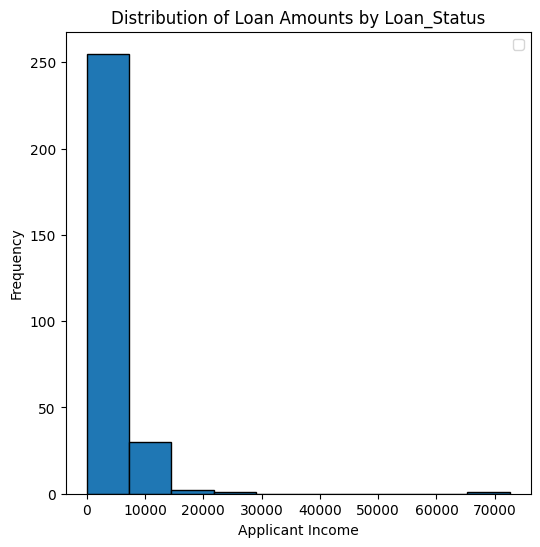

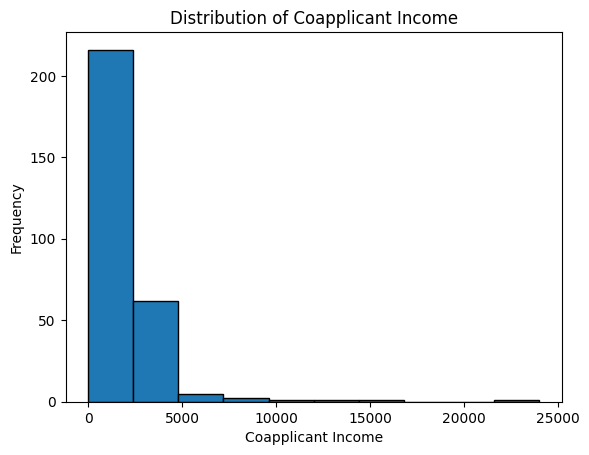

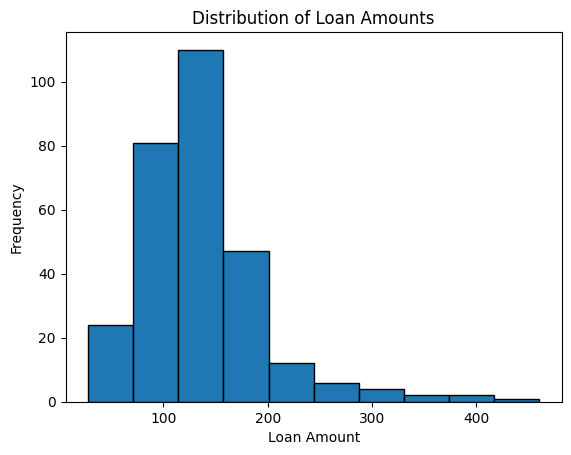

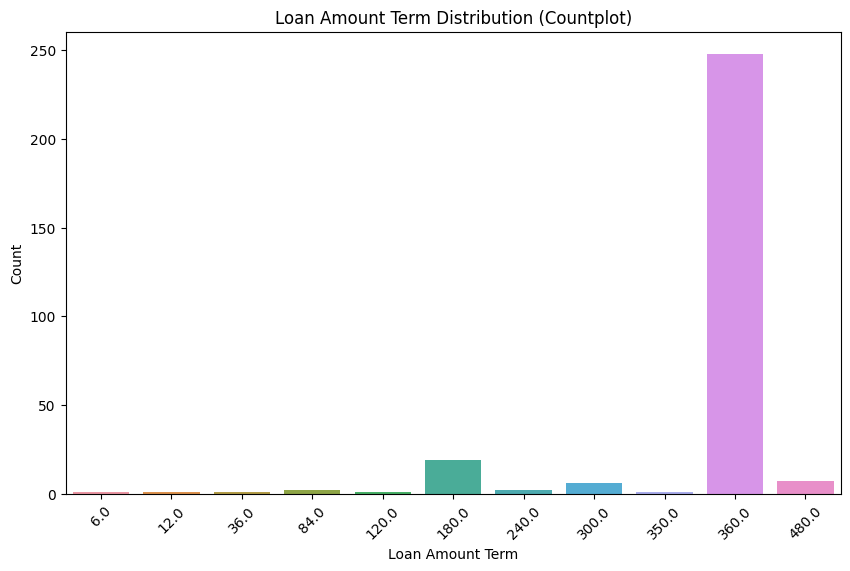

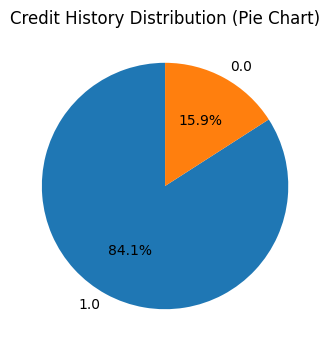

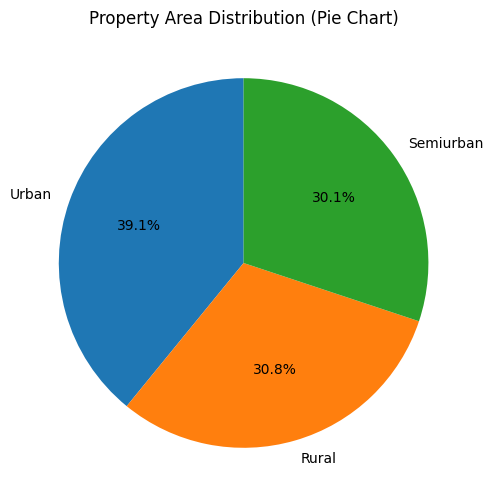

In [26]:
# Display test data gender distrubution: Pie Chart
test_gender_data = test_data['Gender']
test_gender_counts = test_gender_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_gender_counts,
        labels=['Male','Female'],
        autopct='%1.1f%%',
        startangle=90)
test_gender_fig = plt.title('Test Applicant Gender Distribution (Pie Chart)')
plt.show()

# Display test data married status distrubution: Pie Chart
test_married_data = test_data['Married']
test_married_counts = test_married_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_married_counts,
        labels=['Married','Unmarried'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Test Applicant Married Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_grad_data = test_data['Education']
test_grad_counts = test_grad_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_grad_counts,
        labels=['Gradute','Non-Graduate'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Test Applicant Graduate Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_selfEmploy_data = test_data['Self_Employed']
test_selfEmploy_counts = test_selfEmploy_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_selfEmploy_counts,
        labels=['Non Self-Employed','Self-Employed'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Test Applicant Self-Employed Status Distribution')
plt.show()

# Display test data number of dependants distrubution: Bar Chart
test_dependant_data = test_data['Dependents']
plt.figure(figsize=(6, 6))
plt.hist(test_dependant_data,
         bins=10,
         edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Test Applicant Dependants Distribution')
plt.ylabel('Frequency')
plt.show()

# Creatiing a Histogram of Distribution of Applicant Income
plt.figure(figsize=(6, 6))
applicant_income = test_data['ApplicantIncome']
plt.hist(applicant_income, bins=10, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Incomes')
# plt.show()unt')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts by Loan_Status')
plt.legend()  # Show the legend to distinguish the two histograms
plt.show()


# Creatiing a Histogram of Distribution of Coapplicant Income
coapplicant_income = test_data['CoapplicantIncome']
plt.hist(coapplicant_income, bins=10, edgecolor='black')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
plt.show()


# Creatiing a Histogram of Distribution of Loan Amounts
loan_amount = test_data['LoanAmount']
plt.hist(loan_amount, bins=10, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()


#Creating a Countplot of Distribution of Loan Amount Terms
loan_amount_term = test_data['Loan_Amount_Term']
plt.figure(figsize=(10, 6))
sns.countplot(x=loan_amount_term)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Loan Amount Term Distribution (Countplot)')
plt.xticks(rotation=45)
plt.show()


# Creating a Piechart of Distribution of Loan Amount Terms
credit_history = test_data['Credit_History']
credit_history_counts = credit_history.value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Credit History Distribution (Pie Chart)')
plt.show()



# Creatiing a Piechart of Distribution of Property Areas
property_area = test_data['Property_Area']
property_area_counts = property_area.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Property Area Distribution (Pie Chart)')
plt.show()

In [27]:
# Display the current train data


Train a machine learning model to read our data

In [28]:
# Examine shape and columns of train data
print('Shape of Train Data:', train_data.shape, '\n')
print('Columns in Train Data:', train_data.columns)

Shape of Train Data: (480, 12) 

Columns in Train Data: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [29]:
# Create categorical and numerical columns to train model
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Seperate the target variable and drop it from the train data
loanStatus = train_data['Loan_Status']
train_data = train_data.drop(['Loan_Status'], axis=1)

In [30]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

ohe_X=pd.DataFrame(encoder.fit_transform(train_data[categorical_columns]))
ohe_X.columns=encoder.get_feature_names_out(categorical_columns)
train_data.drop(categorical_columns,axis=1,inplace=True)
ohe_X.index=train_data.index
train_data=pd.concat([train_data,ohe_X],axis=1)

train_data.head()

c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Credit_History_1.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
1,4583,1508.0,128.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2583,2358.0,120.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000,0.0,141.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5417,4196.0,267.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
#FOR LOAN AMOUNT PREDICTION

from sklearn.metrics import r2_score

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have preprocessed data with 'LoanAmount' as the target variable
# X should contain all the features except the target variable
X = train_data.drop(['LoanAmount'], axis=1)
y = train_data['LoanAmount']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score to evaluate the model's performance
r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

Mean Squared Error: 4872.345046875001
R-squared Score: 0.42005959959698724


The MSE value of 4872.35 indicates that, on average, the squared difference between the predicted loan amounts and the actual loan amounts is around 4872.35. A lower MSE is desirable, and it suggests that the model's predictions are closer to the actual values.

The R-squared score of 0.42 means that the model explains approximately 42% of the variance in the target variable (LoanAmount). An R-squared score closer to 1 indicates a better fit of the model to the data, while a lower value suggests that the model's predictions are not capturing the variance well.

To improve the model's performance, consider the suggestions mentioned earlier, such as feature engineering, hyperparameter tuning, handling outliers, and trying different regression algorithms. Additionally, you can experiment with other evaluation metrics and visualize the model's performance to gain further insights.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data_encoded' is your DataFrame with all the encoded features, and 'loanStatus' is the target variable
X = train_data
y = loanStatus

# Step 1: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a machine learning algorithm and create an instance of the model
model = RandomForestClassifier(random_state=42)

# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.8229166666666666
Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.46      0.60        28
           Y       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



In [32]:
# Hyperparameter tuning with the Random Forest Classifier. We use scikit-learn for data preprocessing, model training, and hyperparameter tuning.
from sklearn.model_selection import train_test_split, GridSearchCV

model = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Hyperparameter tuning may have led to overfitting the model on the training data, causing it to perform poorly on unseen test data. Overfitting occurs when the model becomes too complex and captures noise in the training data rather than general patterns.
# The hyperparameter search space defined in the GridSearchCV may not have covered all the optimal hyperparameter values, leading to suboptimal choices.
# If the dataset is small, hyperparameter tuning may not lead to significant improvements in model performance. In such cases, it's essential to ensure that the dataset is representative and diverse enough to train a robust model.

Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           N       0.92      0.39      0.55        28
           Y       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96



In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have X_train and y_train as your training data and labels
# Create an instance of the model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)

# Perform cross-validation with 5 folds
# The 'cv' parameter specifies the number of folds (in this case, 5)
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy', 'precision', 'recall', 'f1', etc.)
# 'n_jobs' parameter specifies the number of CPU cores to use (-1 means all available cores)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores for Each Fold:")
print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("\nMean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Score:", std_cv_score)


Cross-Validation Scores for Each Fold:
[0.75324675 0.85714286 0.75324675 0.75324675 0.88157895]

Mean Cross-Validation Score: 0.7996924128503077
Standard Deviation of Cross-Validation Score: 0.05740654313373211


The cross-validation scores for each fold are as follows:

Fold 1: 0.7532

Fold 2: 0.8571

Fold 3: 0.7532

Fold 4: 0.7532

Fold 5: 0.8816

The mean cross-validation score is approximately 0.7997, indicating that, on average, the model achieved an accuracy of around 79.97% across all folds.

The standard deviation of the cross-validation score is approximately 0.0574, which shows the variability or spread of the performance across the different folds. A smaller standard deviation indicates that the model's performance is more consistent across the folds.

Overall, the cross-validation results suggest that the model has reasonable accuracy and consistency in predicting the target variable (Loan_Status). However, you can further explore hyperparameter tuning or try different models to see if you can improve the model's performance.






In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Confusion Matrix:")
print(rf_confusion_matrix)
print("Random Forest Classifier Classification Report:")
print(rf_classification_report)



Random Forest Classifier Accuracy: 0.8229166666666666
Random Forest Classifier Confusion Matrix:
[[13 15]
 [ 2 66]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.46      0.60        28
           Y       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model's accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)


Gradient Boosting Classifier Accuracy: 0.7916666666666666
